**Author :** Rutendo F. Sigauke

**Input  :** 
1. Overlap files between Candidate Cis-regulatory Element (cCRE) database and DBNascent Bidirectionals
2. Multi-bed overlap summary
3. Each database bed file

**Output :**

Figures

# Load libraries

In [1]:
library(ggplot2) 
library(cowplot) 
library(dplyr) 
library(tidyr) 
library(purrr)
library(stringr) 
library(scales)
library(UpSetR)
library(data.table)
library(epitools)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard



Attaching package: ‘data.table’


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:dplyr’:

    between, first, last




# Candicate Cis Regulatory Elements (cCRE) overlapping bidirectionals

## Human

In [2]:
wd <- '/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/annotated_enhancers_bidir_overlaps/'
hg38_overlap_files <- c(paste0(wd,'gtex_eqtl/gtex_bidirectional_overlap.bed'),
                        paste0(wd,'fantom5/fantom5_bidirectional_overlap.bed'),
                        paste0(wd,'encode/encode_bidirectional_overlap.bed'),
                        paste0(wd,'enhancer_atlas/enhancer_atlas_bidirectional_overlap.bed'))
hg38_overlap_files

[1] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/annotated_enhancers_bidir_overlaps/gtex_eqtl/gtex_bidirectional_overlap.bed"               
[2] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/annotated_enhancers_bidir_overlaps/fantom5/fantom5_bidirectional_overlap.bed"              
[3] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/annotated_enhancers_bidir_overlaps/encode/encode_bidirectional_overlap.bed"                
[4] "/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/annotated_enhancers_bidir_overlaps/enhancer_atlas/enhancer_atlas_bidirectional_overlap.bed"

In [3]:
hg38_overlap_list <- lapply(hg38_overlap_files, data.table::fread)
overlaps <- as.numeric(lapply(hg38_overlap_list, nrow))

In [4]:
overlaps

[1] 745092  36840 419497 126480

In [5]:
hg38_reg_database <- c('GTEx','FANTOM5','ENCODE','Enhancer Atlas')
hg38_total_reg <- c(4631659, 63285, 926535, 192173)
hg38_overlap_reg <- overlaps 

hg38_summary_overlaps <- as.data.frame(hg38_reg_database)
hg38_summary_overlaps$total_reg <- hg38_total_reg
hg38_summary_overlaps$overlap_reg <- hg38_overlap_reg
hg38_summary_overlaps$percent_overlap <- (hg38_summary_overlaps$overlap_reg/hg38_summary_overlaps$total_reg)*100
hg38_summary_overlaps$reg_database <- factor(hg38_summary_overlaps$hg38_reg_database,
                                        levels=c('GTEx', 'ENCODE','FANTOM5','Enhancer Atlas'))
hg38_summary_overlaps

hg38_reg_database,total_reg,overlap_reg,percent_overlap,reg_database
<fct>,<dbl>,<dbl>,<dbl>,<fct>
GTEx,4631659,745092,16.08694,GTEx
FANTOM5,63285,36840,58.21285,FANTOM5
ENCODE,926535,419497,45.27589,ENCODE
Enhancer Atlas,192173,126480,65.81570,Enhancer Atlas


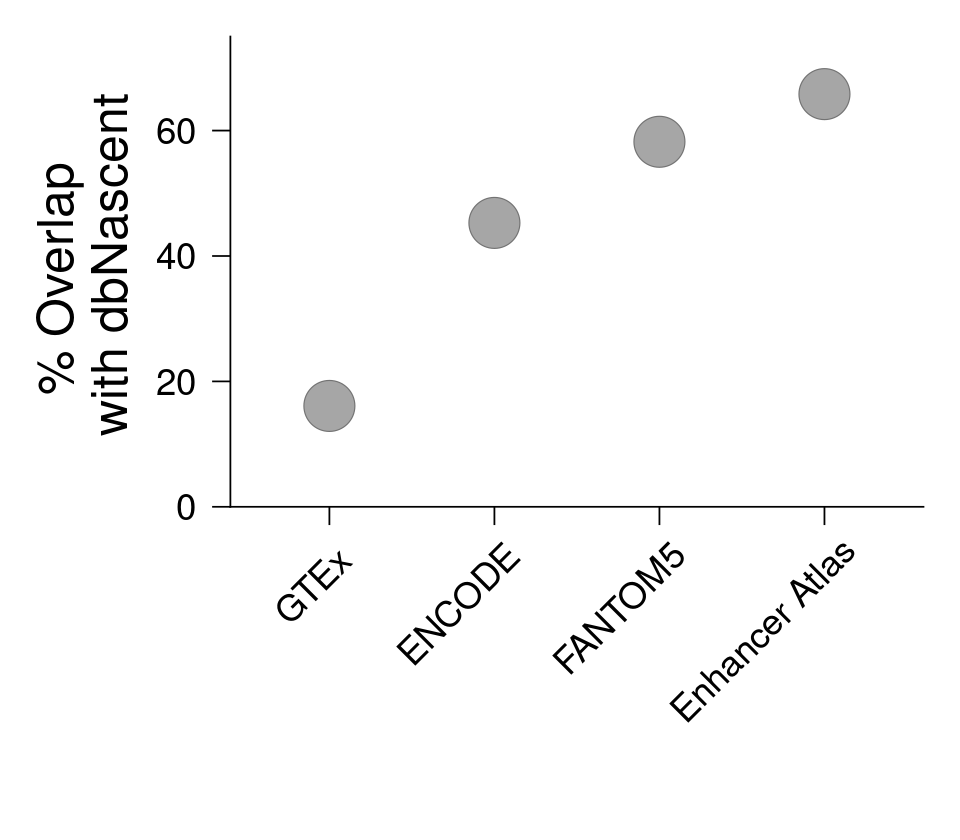

In [6]:
options(repr.plot.width=8, repr.plot.height=7)

h1 <- ggplot(hg38_summary_overlaps, aes(x=reg_database, y=percent_overlap)) +
  geom_point(size=14, 
             color="gray45",
             fill="gray65", 
             shape=21) +
ylab('% Overlap \n with dbNascent') + xlab(' ') +
theme_cowplot(44) +
#ggtitle(expression(paste("dbNascent Overlaps"))) +
theme(plot.title = element_text(size = 35, hjust = 0.5, face='bold'),
                  #title = element_text(face = "bold"), 
                  axis.title = element_text(size = 30), 
                  axis.text.x = element_text(size = 22, 
                                             angle=45, 
                                             vjust=0.95,
                                             hjust=0.91),
                  axis.text = element_text(size = 22)) +
scale_y_continuous(limits = c(0,75), expand = c(0, 0))  +            
theme(panel.background = element_rect(fill = "transparent"), 
      plot.background = element_rect(fill = "transparent", color = NA),
      legend.key = element_rect(colour = "transparent", fill = "transparent"),
      legend.background = element_rect(fill = "transparent"), 
      legend.box.background = element_rect(fill = "transparent"))

h1

In [7]:
ggsave(h1, width = 8, height = 6,
       filename = "/Users/rusi2317/projects/meta_analysis_qc/hg38/paper_figures/hg38_db_overlap_with_dbnascent.pdf", 
       bg = "transparent")

ggsave(h1, width = 8, height = 6,
       filename = "/Users/rusi2317/projects/meta_analysis_qc/hg38/paper_figures/hg38_db_overlap_with_dbnascent.png", 
       bg = "transparent")

## Mouse

In [8]:
wd_mm10 <- '/scratch/Users/rusi2317/projects/meta_analysis_qc/mm10/processed_data/annotated_enhancers_bidir_overlaps/'
mm10_overlap_files <- c(paste0(wd_mm10,'eqtl/eqtl_brain_bidirectional_overlap.bed'),
                        paste0(wd_mm10,'fantom5/fantom5_bidirectional_overlap.bed'),
                        paste0(wd_mm10,'encode/encode_bidirectional_overlap.bed'),
                        paste0(wd_mm10,'enhancer_atlas/enhancer_atlas_bidirectional_overlap.bed'))
mm10_overlap_files

[1] "/scratch/Users/rusi2317/projects/meta_analysis_qc/mm10/processed_data/annotated_enhancers_bidir_overlaps/eqtl/eqtl_brain_bidirectional_overlap.bed"              
[2] "/scratch/Users/rusi2317/projects/meta_analysis_qc/mm10/processed_data/annotated_enhancers_bidir_overlaps/fantom5/fantom5_bidirectional_overlap.bed"              
[3] "/scratch/Users/rusi2317/projects/meta_analysis_qc/mm10/processed_data/annotated_enhancers_bidir_overlaps/encode/encode_bidirectional_overlap.bed"                
[4] "/scratch/Users/rusi2317/projects/meta_analysis_qc/mm10/processed_data/annotated_enhancers_bidir_overlaps/enhancer_atlas/enhancer_atlas_bidirectional_overlap.bed"

In [9]:
mm10_overlap_list <- lapply(mm10_overlap_files, data.table::fread)
mm10_overlaps <- as.numeric(lapply(mm10_overlap_list, nrow))

In [10]:
mm10_overlaps

[1]   1089  32840 202706 198380

In [11]:
mm10_reg_database <- c('eQTLs','FANTOM5','ENCODE','Enhancer Atlas')
mm10_total_reg <- c(5531, 49797, 343731, 519730) 
mm10_overlap_reg <- mm10_overlaps 

mm10_summary_overlaps <- as.data.frame(mm10_reg_database)
mm10_summary_overlaps$total_reg <- mm10_total_reg
mm10_summary_overlaps$overlap_reg <- mm10_overlap_reg
mm10_summary_overlaps$percent_overlap <- (mm10_summary_overlaps$overlap_reg/mm10_summary_overlaps$total_reg)*100
mm10_summary_overlaps$reg_database <- factor(mm10_summary_overlaps$mm10_reg_database,
                                        levels=c('eQTLs', 'ENCODE','FANTOM5','Enhancer Atlas'))
mm10_summary_overlaps

mm10_reg_database,total_reg,overlap_reg,percent_overlap,reg_database
<fct>,<dbl>,<dbl>,<dbl>,<fct>
eQTLs,5531,1089,19.68903,eQTLs
FANTOM5,49797,32840,65.94775,FANTOM5
ENCODE,343731,202706,58.97228,ENCODE
Enhancer Atlas,519730,198380,38.16982,Enhancer Atlas


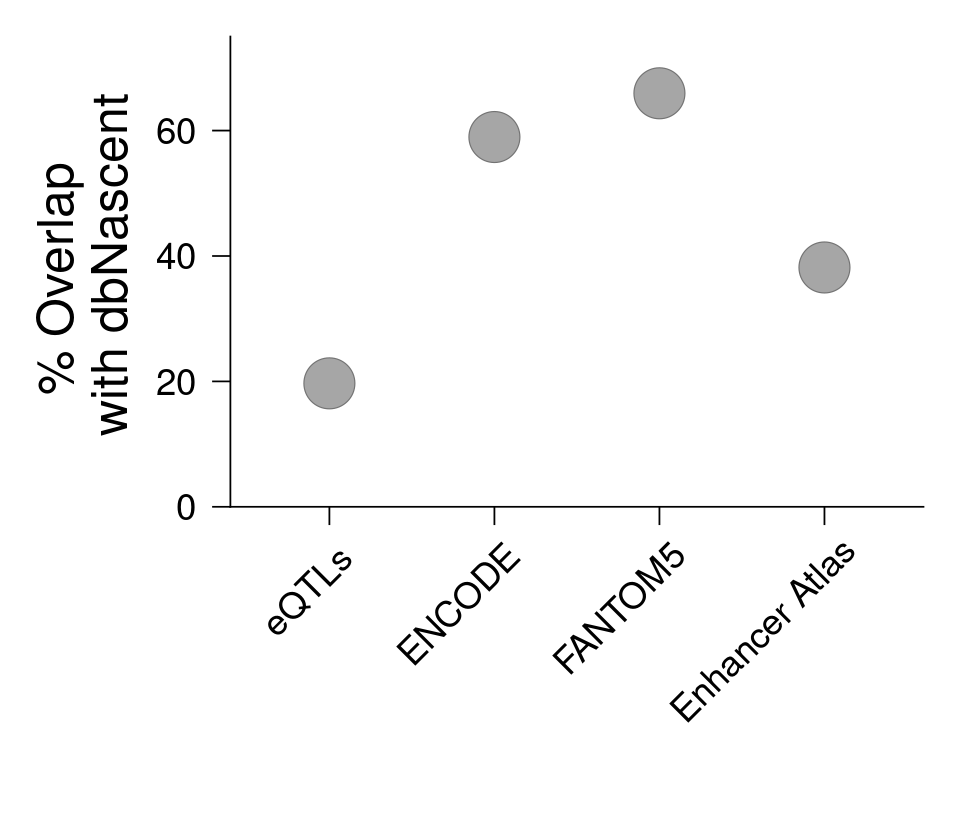

In [12]:
options(repr.plot.width=8, repr.plot.height=7)

m1 <- ggplot(mm10_summary_overlaps, aes(x=reg_database, y=percent_overlap)) +
  geom_point(size=14, 
             color="gray45",
             fill="gray65", 
             shape=21) +
ylab('% Overlap \n with dbNascent') + xlab(' ') +
theme_cowplot(44) +
#ggtitle(expression(paste("dbNascent Overlaps"))) +
theme(plot.title = element_text(size = 35, hjust = 0.5, face='bold'),
                  #title = element_text(face = "bold"), 
                  axis.title = element_text(size = 30), 
                  axis.text.x = element_text(size = 22, 
                                             angle=45, 
                                             vjust=0.95,
                                             hjust=0.91),
                  axis.text = element_text(size = 22)) +
scale_y_continuous(limits = c(0,75), expand = c(0, 0))  +            
theme(panel.background = element_rect(fill = "transparent"), 
      plot.background = element_rect(fill = "transparent", color = NA),
      legend.key = element_rect(colour = "transparent", fill = "transparent"),
      legend.background = element_rect(fill = "transparent"), 
      legend.box.background = element_rect(fill = "transparent"))

m1

In [13]:
ggsave(m1, width = 8, height = 6,
       filename = "/Users/rusi2317/projects/meta_analysis_qc/mm10/paper_figures/mm10_db_overlap_with_dbnascent.pdf", 
       bg = "transparent")

ggsave(m1, width = 8, height = 6,
       filename = "/Users/rusi2317/projects/meta_analysis_qc/mm10/paper_figures/mm10_db_overlap_with_dbnascent.png", 
       bg = "transparent")

# Overlaps of all cCRE databases

## Human

In [14]:
hg38_bidir_overlaps <- read.table('/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/annotated_enhancers_bidir_overlaps/multiway_venn.txt',
                             sep='\t', header=T)
hg38_bidir_overlaps

combinations,count
<fct>,<int>
dbNascent,51514
EnhancerAtlas,43507
FANTOM5,883
ENCODE,64558
dbNascent&EnhancerAtlas,450889
dbNascent&FANTOM5,447
dbNascent&ENCODE,42739
EnhancerAtlas&FANTOM5,14570
FANTOM5&ENCODE,1618


In [15]:
hg38_bidirInput <- hg38_bidir_overlaps$count
names(hg38_bidirInput) <- hg38_bidir_overlaps$combinations
hg38_bidirInput

dbNascent                          EnhancerAtlas 
                                 51514                                  43507 
                               FANTOM5                                 ENCODE 
                                   883                                  64558 
               dbNascent&EnhancerAtlas                      dbNascent&FANTOM5 
                                450889                                    447 
                      dbNascent&ENCODE                  EnhancerAtlas&FANTOM5 
                                 42739                                  14570 
                        FANTOM5&ENCODE                   EnhancerAtlas&ENCODE 
                                  1618                                  21006 
       dbNascent&EnhancerAtlas&FANTOM5           EnhancerAtlas&FANTOM5&ENCODE 
                                  5078                                    848 
              dbNascent&FANTOM5&ENCODE         dbNascent&EnhancerAtlas&ENCODE 
                                  3417                                 264331 
dbNascent&EnhancerAtlas&FANTOM5&ENCODE 
                                 29106

In [16]:
enhancers <- c("dbNascent","EnhancerAtlas","FANTOM5","ENCODE")

In [17]:
hg38_subsets <- hg38_bidir_overlaps$combination
## Check if each subset
hg38_enhancer_mat <- map_dfc(hg38_subsets, str_detect, enhancers) %>%
    data.frame() %>%
    t() %>% # transpose the result
    as_tibble()
colnames(hg38_enhancer_mat)  <- enhancers
hg38_enhancer_mat$count <- hg38_bidir_overlaps$count
hg38_enhancer_mat %>% print(n = nrow(hg38_enhancer_mat))

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if
`.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`.”


# A tibble: 15 × 5
   dbNascent EnhancerAtlas FANTOM5 ENCODE  count
   <lgl>     <lgl>         <lgl>   <lgl>   <int>
 1 TRUE      FALSE         FALSE   FALSE   51514
 2 FALSE     TRUE          FALSE   FALSE   43507
 3 FALSE     FALSE         TRUE    FALSE     883
 4 FALSE     FALSE         FALSE   TRUE    64558
 5 TRUE      TRUE          FALSE   FALSE  450889
 6 TRUE      FALSE         TRUE    FALSE     447
 7 TRUE      FALSE         FALSE   TRUE    42739
 8 FALSE     TRUE          TRUE    FALSE   14570
 9 FALSE     FALSE         TRUE    TRUE     1618
10 FALSE     TRUE          FALSE   TRUE    21006
11 TRUE      TRUE          TRUE    FALSE    5078
12 FALSE     TRUE          TRUE    TRUE      848
13 TRUE      FALSE         TRUE    TRUE     3417
14 TRUE      TRUE          FALSE   TRUE   264331
15 TRUE      TRUE          TRUE    TRUE    29106


In [18]:
hg38_indvs <- hg38_enhancer_mat %>%
    uncount(count) 
colnames(hg38_indvs) <- c('dbNascent','EnhancerAtlas', 'FANTOM5','ENCODE')
hg38_indvs

dbNascent,EnhancerAtlas,FANTOM5,ENCODE
<lgl>,<lgl>,<lgl>,<lgl>
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE


In [19]:
enhancers2 <- c('dbNascent','EnhancerAtlas', 'FANTOM5','ENCODE')

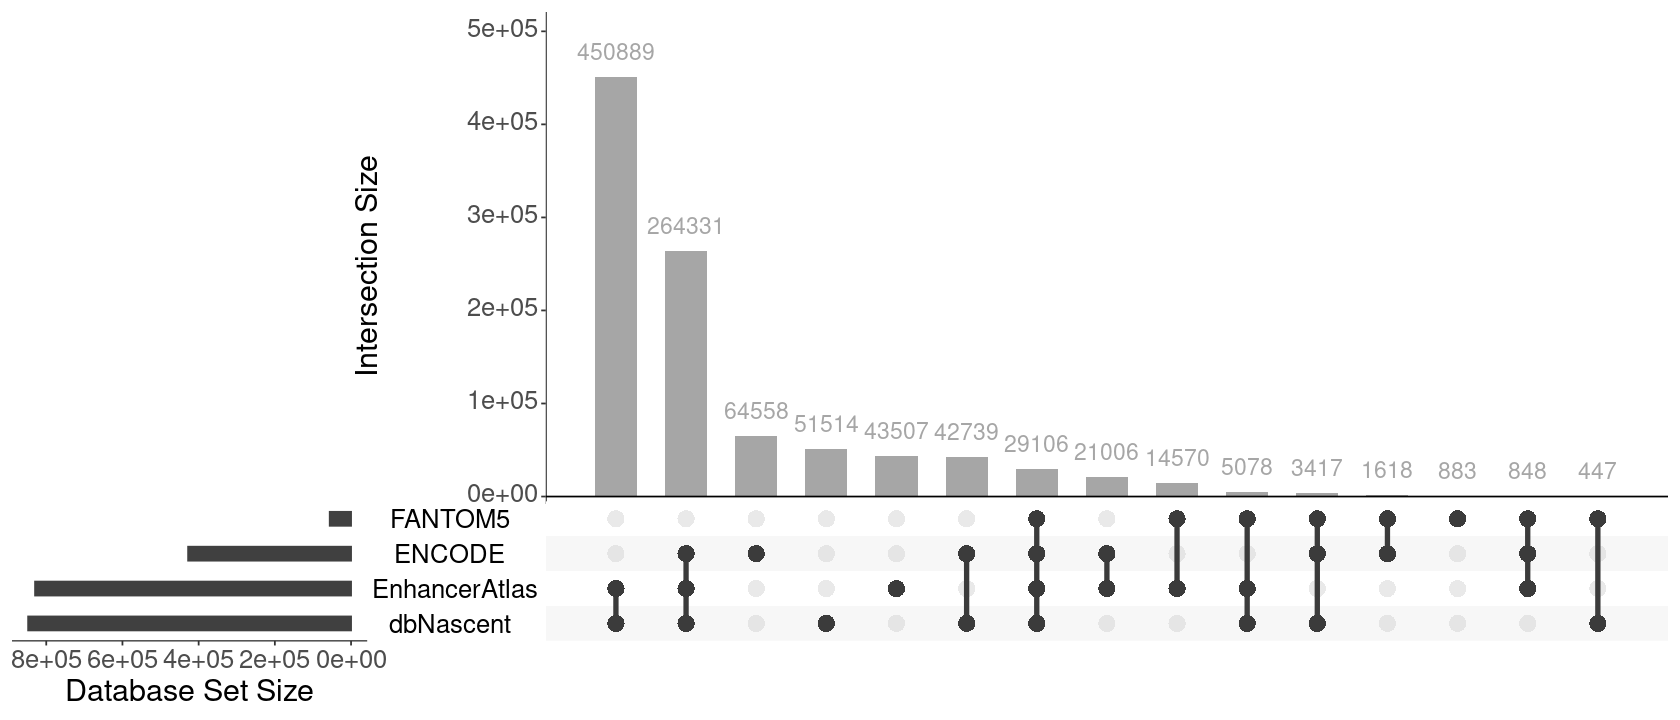

In [20]:
options(repr.plot.width=14, repr.plot.height=6)

hu <- UpSetR::upset(fromExpression(hg38_bidirInput), 
              main.bar.color = "gray65",
              sets.bar.color = "gray25",
              order.by = "freq",
              point.size = 4.5,
              line.size = 1.5 ,
              text.scale = 2.2,
              mainbar.y.label = "Intersection Size", 
              sets.x.label = "Database Set Size",
              set_size.show = FALSE)
hu

In [21]:
pdf(file="/Users/rusi2317/projects/meta_analysis_qc/hg38/paper_figures/hg38_enhancer_db_overlaps.pdf", 
    width = 16,
    height = 6) 
hu
dev.off()

png 
  2

## Mouse

In [22]:
mm10_bidir_overlaps <- read.table('/Users/rusi2317/projects/meta_analysis_qc/mm10/processed_data/annotated_enhancers_bidir_overlaps/multiway_venn.txt',
                             sep='\t', header=T)
mm10_bidir_overlaps

combinations,count
<fct>,<int>
dbNascent,47723
EnhancerAtlas,309892
FANTOM5,681
ENCODE,14185
dbNascent&EnhancerAtlas,447001
dbNascent&FANTOM5,644
dbNascent&ENCODE,9596
EnhancerAtlas&FANTOM5,11127
FANTOM5&ENCODE,336


In [23]:
mm10_bidirInput <- mm10_bidir_overlaps$count
names(mm10_bidirInput) <- mm10_bidir_overlaps$combinations
mm10_bidirInput

dbNascent                          EnhancerAtlas 
                                 47723                                 309892 
                               FANTOM5                                 ENCODE 
                                   681                                  14185 
               dbNascent&EnhancerAtlas                      dbNascent&FANTOM5 
                                447001                                    644 
                      dbNascent&ENCODE                  EnhancerAtlas&FANTOM5 
                                  9596                                  11127 
                        FANTOM5&ENCODE                   EnhancerAtlas&ENCODE 
                                   336                                   9655 
       dbNascent&EnhancerAtlas&FANTOM5           EnhancerAtlas&FANTOM5&ENCODE 
                                 10280                                    452 
              dbNascent&FANTOM5&ENCODE         dbNascent&EnhancerAtlas&ENCODE 
                                   908                                 142584 
dbNascent&EnhancerAtlas&FANTOM5&ENCODE 
                                 21999

In [24]:
enhancers <- c("dbNascent","EnhancerAtlas","FANTOM5","ENCODE")

In [25]:
mm10_subsets <- mm10_bidir_overlaps$combination
## Check if each subset mentions each symptom or not
mm10_enhancer_mat <- map_dfc(mm10_subsets, str_detect, enhancers) %>%
    data.frame() %>%
    t() %>% # transpose the result, ugh
    as_tibble()
colnames(mm10_enhancer_mat)  <- enhancers
mm10_enhancer_mat$count <- mm10_bidir_overlaps$count
mm10_enhancer_mat %>% print(n = nrow(mm10_enhancer_mat))

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`


# A tibble: 15 × 5
   dbNascent EnhancerAtlas FANTOM5 ENCODE  count
   <lgl>     <lgl>         <lgl>   <lgl>   <int>
 1 TRUE      FALSE         FALSE   FALSE   47723
 2 FALSE     TRUE          FALSE   FALSE  309892
 3 FALSE     FALSE         TRUE    FALSE     681
 4 FALSE     FALSE         FALSE   TRUE    14185
 5 TRUE      TRUE          FALSE   FALSE  447001
 6 TRUE      FALSE         TRUE    FALSE     644
 7 TRUE      FALSE         FALSE   TRUE     9596
 8 FALSE     TRUE          TRUE    FALSE   11127
 9 FALSE     FALSE         TRUE    TRUE      336
10 FALSE     TRUE          FALSE   TRUE     9655
11 TRUE      TRUE          TRUE    FALSE   10280
12 FALSE     TRUE          TRUE    TRUE      452
13 TRUE      FALSE         TRUE    TRUE      908
14 TRUE      TRUE          FALSE   TRUE   142584
15 TRUE      TRUE          TRUE    TRUE    21999


In [26]:
mm10_indvs <- mm10_enhancer_mat %>%
    uncount(count) 
colnames(mm10_indvs) <- c('dbNascent','EnhancerAtlas', 'FANTOM5','ENCODE')
mm10_indvs

dbNascent,EnhancerAtlas,FANTOM5,ENCODE
<lgl>,<lgl>,<lgl>,<lgl>
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE


In [27]:
enhancers2 <- c('dbNascent','EnhancerAtlas', 'FANTOM5','ENCODE')

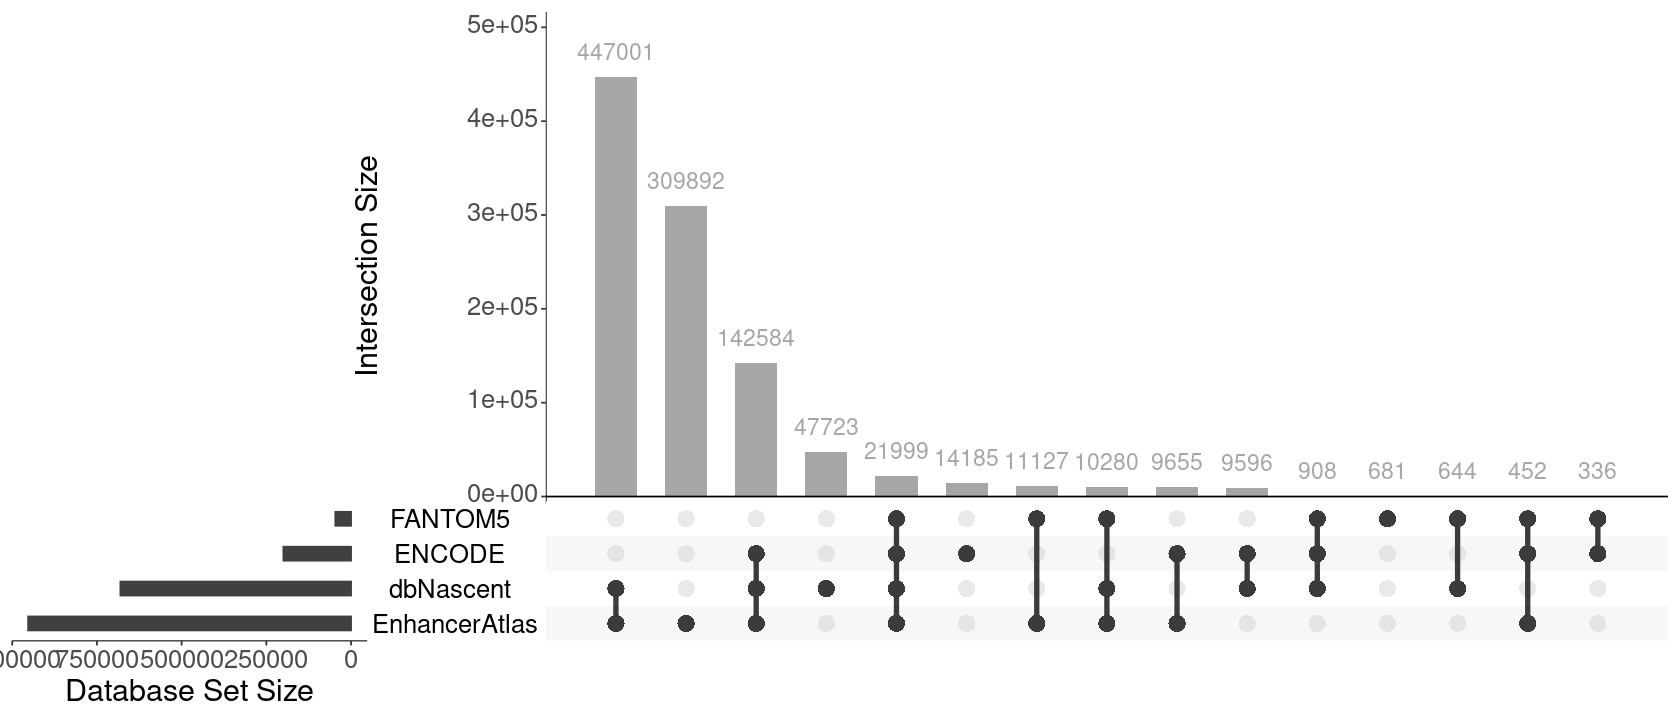

In [28]:
options(repr.plot.width=14, repr.plot.height=6)

mu <- UpSetR::upset(fromExpression(mm10_bidirInput), 
              main.bar.color = "gray65",
              sets.bar.color = "gray25",
              order.by = "freq",
              point.size = 4.5,
              line.size = 1.5 ,
              text.scale = 2.2,
              mainbar.y.label = "Intersection Size", 
              sets.x.label = "Database Set Size",
              set_size.show = FALSE)
mu

In [29]:
pdf(file="/Users/rusi2317/projects/meta_analysis_qc/mm10/paper_figures/mm10_enhancer_db_overlaps.pdf", 
    width = 16,
    height = 6) 
hu
dev.off()

png 
  2

# Length distributions

## Human

In [30]:
EnhancerAtlas <- data.table::fread("/scratch/Users/rusi2317/projects/meta_analysis_qc/hg38/enhancers/Enhancer_Atlas_species_enh_bed/hg38_liftOverFrom_hg19.bed")
EnhancerAtlas$width <- EnhancerAtlas$V3 - EnhancerAtlas$V2 +1
EnhancerAtlas$type <- "EnhancerAtlas"
dim(EnhancerAtlas)
head(EnhancerAtlas)


[1] 192173      5

V1,V2,V3,width,type
<chr>,<int>,<int>,<dbl>,<chr>
chr1,12230,12610,381,EnhancerAtlas
chr1,12720,13220,501,EnhancerAtlas
chr1,14830,14960,131,EnhancerAtlas
chr1,15040,15790,751,EnhancerAtlas
chr1,15950,16600,651,EnhancerAtlas
chr1,16770,16850,81,EnhancerAtlas


In [31]:
encode_all <- data.table::fread("/scratch/Users/rusi2317/projects/meta_analysis_qc/hg38/enhancers/ENCODE/encodeCcreCombined_sorted.bed")
encode <- encode_all[,c(1:3)]
encode$width <- encode$V3 - encode$V2 + 1
encode$type <- "ENCODE"
dim(encode)
head(encode)

[1] 926535      5

V1,V2,V3,width,type
<chr>,<int>,<int>,<dbl>,<chr>
chr1,181251,181601,351,ENCODE
chr1,190865,191071,207,ENCODE
chr1,778562,778912,351,ENCODE
chr1,779086,779355,270,ENCODE
chr1,779727,780060,334,ENCODE
chr1,790397,790626,230,ENCODE


In [32]:
fantom_all <- data.table::fread("/scratch/Users/rusi2317/projects/meta_analysis_qc/hg38/enhancers/F5.hg38.enhancers_sorted.bed")
fantom <- fantom_all[,c(1:3)]
fantom$width <- fantom$V3 - fantom$V2 + 1
fantom$type <- "FANTOM5"
dim(fantom)
head(fantom)

[1] 63285     5

V1,V2,V3,width,type
<chr>,<int>,<int>,<dbl>,<chr>
chr1,905311,906011,701,FANTOM5
chr1,906863,906986,124,FANTOM5
chr1,920384,920777,394,FANTOM5
chr1,921159,921377,219,FANTOM5
chr1,922829,923779,951,FANTOM5
chr1,933185,933304,120,FANTOM5


In [33]:
bidir_all <- data.table::fread("/scratch/Users/rusi2317/projects/meta_analysis_qc/hg38/annotations/hg38_tfit_dreg_bidirectionals.bed")
bidir <- bidir_all[,c(1:3)]
bidir$width <- bidir$V3 - bidir$V2 + 1
bidir$type <- "dbNascent"
dim(bidir)
head(bidir)

[1] 847521      5

V1,V2,V3,width,type
<chr>,<int>,<int>,<dbl>,<chr>
chr1,3917,4919,1003,dbNascent
chr1,5632,6042,411,dbNascent
chr1,6132,6486,355,dbNascent
chr1,7207,7841,635,dbNascent
chr1,10945,11371,427,dbNascent
chr1,12182,12456,275,dbNascent


In [34]:
ccres <- rbind(bidir, fantom, encode, EnhancerAtlas)
dim(ccres)

[1] 2029514       5

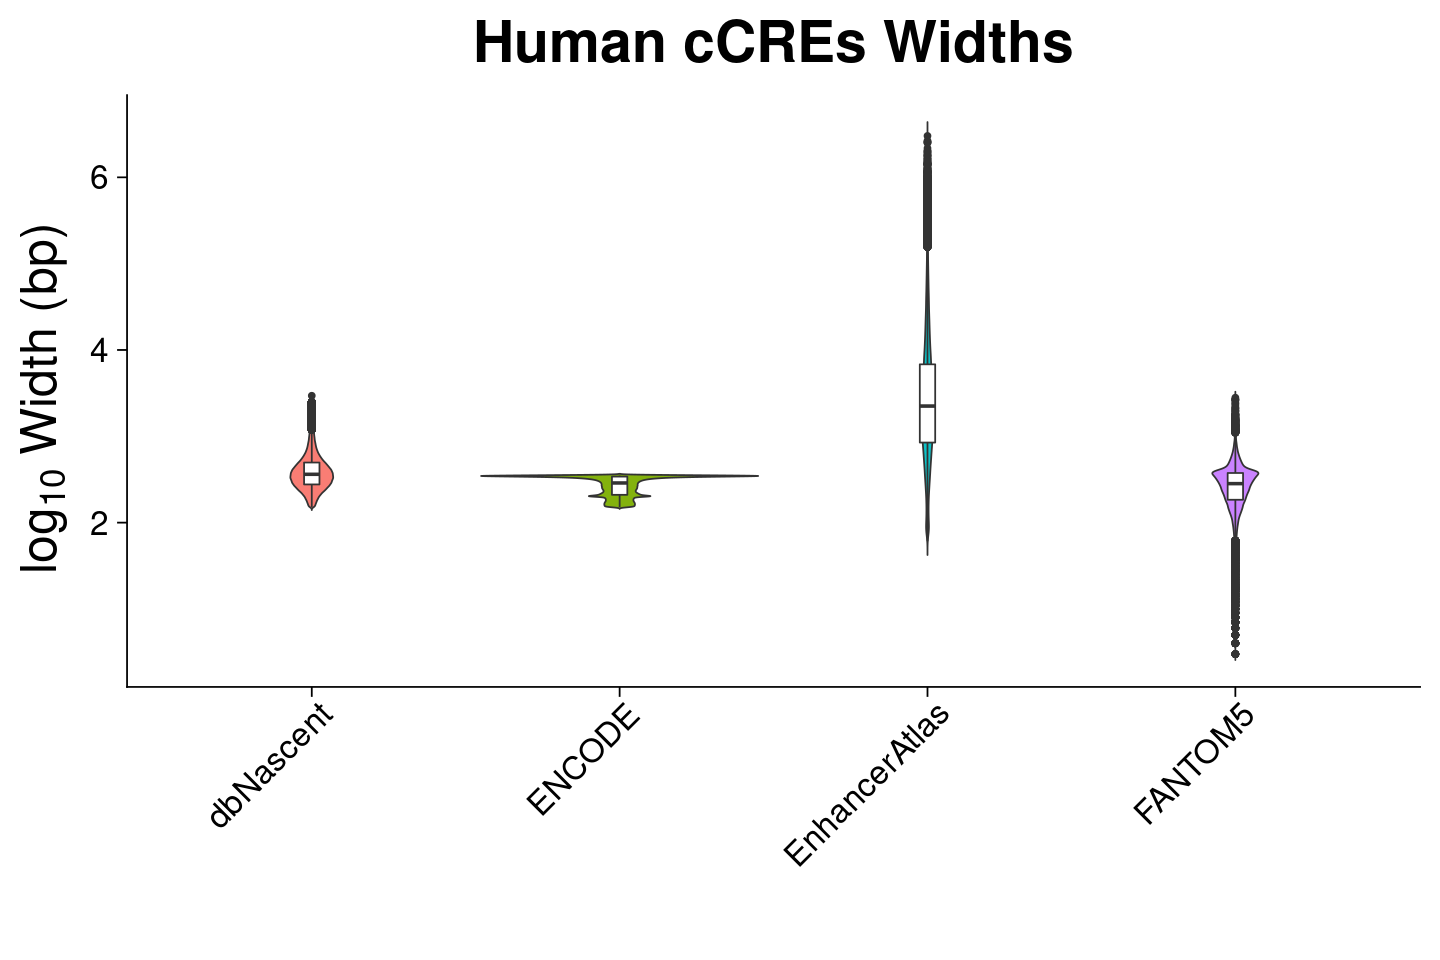

In [35]:
options(repr.plot.width=12, repr.plot.height=8)

ccres_widths <- ggplot(ccres,
       aes(x=type, 
           y=log(width, base=10))) +
  geom_violin(trim=FALSE, alpha=0.95, aes(fill=type)) +
  geom_boxplot(width=0.05, fill="white") +
labs(title="Human cCREs Widths",
     x=" ", 
     y = expression(paste(log[10]," Width (bp)", sep=' ')) )+
theme_cowplot(24) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 30), 
      axis.title = element_text(size = 30), 
      axis.text = element_text(size = 20),
     axis.text.x = element_text(size = 20, angle=45, hjust=0.95),
     legend.position="none") 

ccres_widths

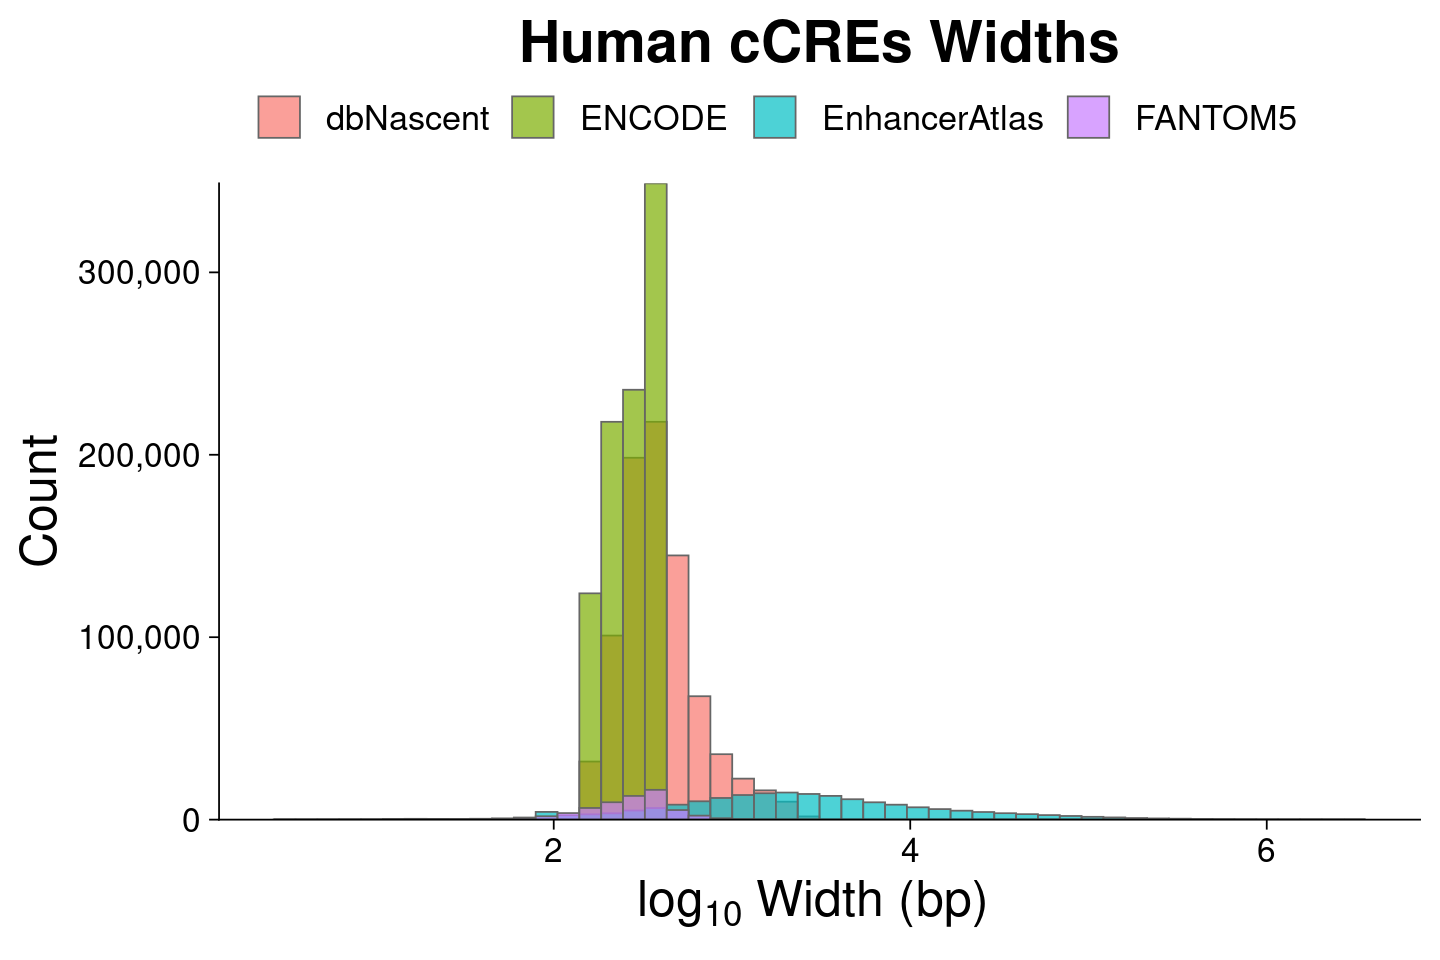

In [36]:
options(repr.plot.width=12, repr.plot.height=8)

ccres_widths_hist <- ggplot(ccres,
       aes(x=log(width, base=10), fill=type)) +
  geom_histogram(alpha=0.7, position="identity", bins = 50, color="gray40") +
labs(title="Human cCREs Widths",
     y="Count", 
     x = expression(paste(log[10]," Width (bp)", sep=' ')),
    fill=" ")+
theme_cowplot(24) +
scale_y_continuous(labels = scales::label_comma(), expand = c(0, 0)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 30), 
      axis.title = element_text(size = 30), 
      axis.text = element_text(size = 20),
     axis.text.x = element_text(size = 20),
     legend.position="top") 

ccres_widths_hist

## Mouse

In [37]:
EnhancerAtlas <- data.table::fread("/scratch/Users/rusi2317/projects/meta_analysis_qc/mm10/enhancers/Enhancer_Atlas_species_enh_bed/mm10_liftOverFrom_mm9_sorted.bed")
EnhancerAtlas$width <- EnhancerAtlas$V3 -EnhancerAtlas$V2 +1
EnhancerAtlas$type <- "EnhancerAtlas"
dim(EnhancerAtlas)
head(EnhancerAtlas)

[1] 519730      5

V1,V2,V3,width,type
<chr>,<int>,<int>,<dbl>,<chr>
chr1,3009939,3015775,5837,EnhancerAtlas
chr1,3019162,3019521,360,EnhancerAtlas
chr1,3019767,3020200,434,EnhancerAtlas
chr1,3020451,3022525,2075,EnhancerAtlas
chr1,3022564,3032563,10000,EnhancerAtlas
chr1,3032770,3038350,5581,EnhancerAtlas


In [38]:
encode_all <- data.table::fread("/scratch/Users/rusi2317/projects/meta_analysis_qc/mm10/enhancers/ENCODE/mm10_encodeCcreCombined.bed")
encode <- encode_all[,c(1:3)]
encode$width <- encode$V3 - encode$V2 + 1
encode$type <- "ENCODE"
dim(encode)
head(encode)

[1] 343731      5

V1,V2,V3,width,type
<chr>,<int>,<int>,<dbl>,<chr>
chr1,3119617,3119911,295,ENCODE
chr1,3119914,3120120,207,ENCODE
chr1,3120346,3120662,317,ENCODE
chr1,3292622,3292971,350,ENCODE
chr1,3322453,3322797,345,ENCODE
chr1,3399871,3400218,348,ENCODE


In [39]:
fantom_all <- data.table::fread("/scratch/Users/rusi2317/projects/meta_analysis_qc/mm10/enhancers/F5.mm10.enhancers_sorted.bed")
fantom <- fantom_all[,c(1:3)]
fantom$width <- fantom$V3 - fantom$V2 + 1
fantom$type <- "FANTOM5"
dim(fantom)
head(fantom)

[1] 49797     5

V1,V2,V3,width,type
<chr>,<int>,<int>,<dbl>,<chr>
chr1,3210826,3210847,22,FANTOM5
chr1,3318911,3319261,351,FANTOM5
chr1,3468075,3468325,251,FANTOM5
chr1,3635524,3635845,322,FANTOM5
chr1,3672526,3672630,105,FANTOM5
chr1,3928654,3928920,267,FANTOM5


In [40]:
bidir_all <- data.table::fread("/scratch/Users/rusi2317/projects/meta_analysis_qc/mm10/annotations/mm10_tfit_dreg_bidirectionals.bed")
bidir <- bidir_all[,c(1:3)]
bidir$width <- bidir$V3 - bidir$V2 + 1
bidir$type <- "dbNascent"
dim(bidir)
head(bidir)

[1] 680735      5

V1,V2,V3,width,type
<chr>,<int>,<int>,<dbl>,<chr>
chr1,6234,6612,379,dbNascent
chr1,6855,7341,487,dbNascent
chr1,7420,8220,801,dbNascent
chr1,8419,8749,331,dbNascent
chr1,8885,9199,315,dbNascent
chr1,9679,9991,313,dbNascent


In [41]:
ccres <- rbind(bidir, fantom, encode, EnhancerAtlas)
dim(ccres)

[1] 1593993       5

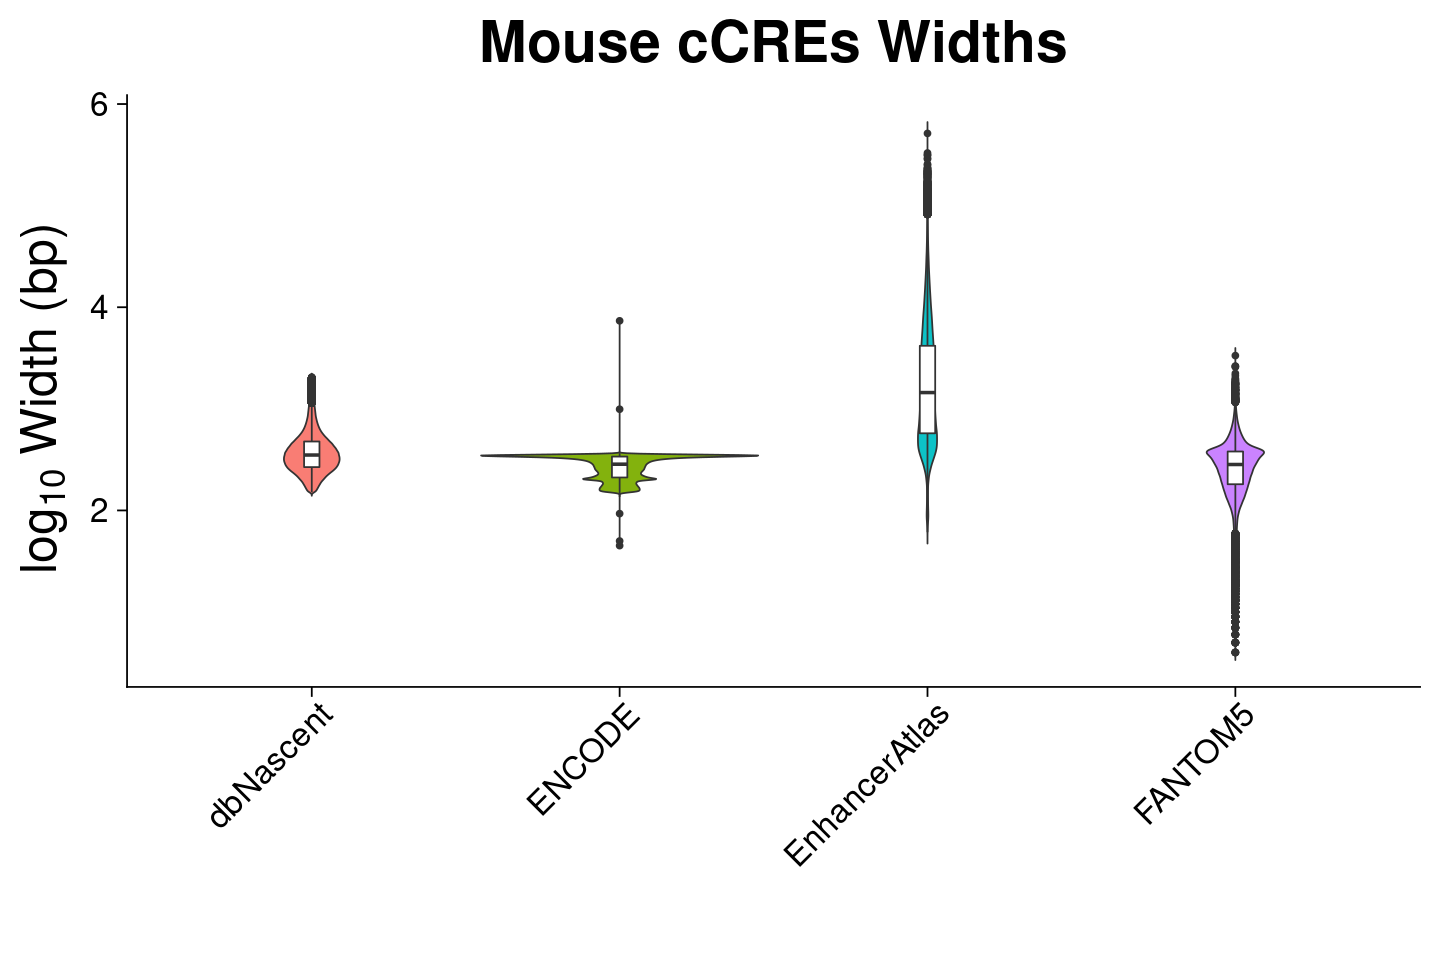

In [42]:
options(repr.plot.width=12, repr.plot.height=8)

ccres_widths <- ggplot(ccres,
       aes(x=type, 
           y=log(width, base=10))) +
  geom_violin(trim=FALSE, alpha=0.95, aes(fill=type)) +
  geom_boxplot(width=0.05, fill="white") +
labs(title="Mouse cCREs Widths",
     x=" ", 
     y = expression(paste(log[10]," Width (bp)", sep=' ')) )+
theme_cowplot(24) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 30), 
      axis.title = element_text(size = 30), 
      axis.text = element_text(size = 20),
     axis.text.x = element_text(size = 20, angle=45, hjust=0.95),
     legend.position="none") 

ccres_widths

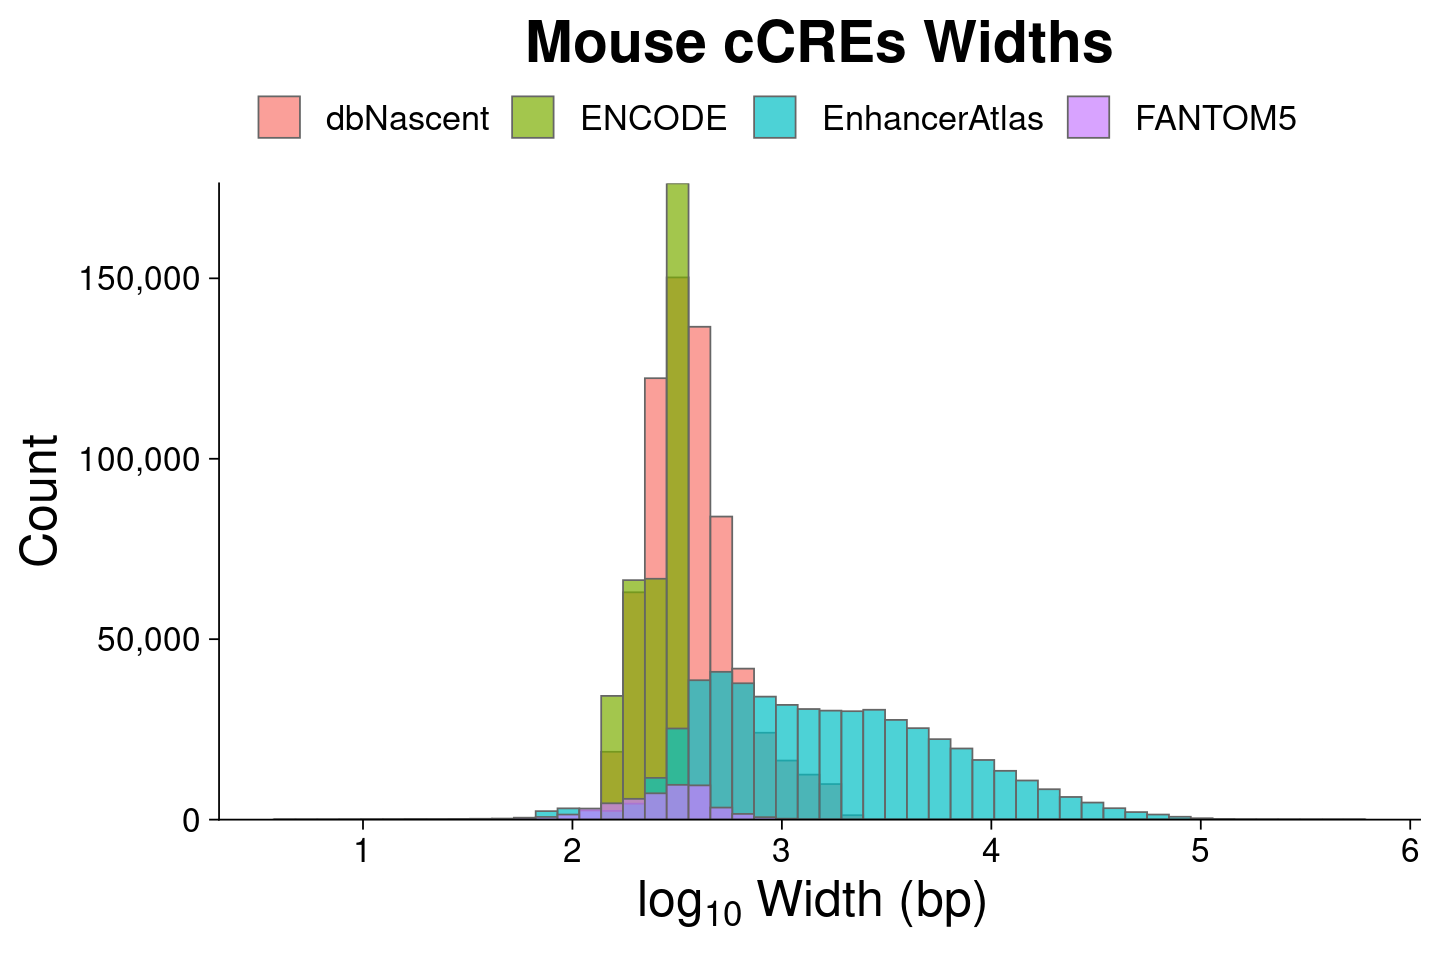

In [43]:
options(repr.plot.width=12, repr.plot.height=8)

ccres_widths_hist <- ggplot(ccres,
       aes(x=log(width, base=10), fill=type)) +
  geom_histogram(alpha=0.7, position="identity", bins = 50, color="gray40") +
labs(title="Mouse cCREs Widths",
     y="Count", 
     x = expression(paste(log[10]," Width (bp)", sep=' ')),
    fill=" ")+
theme_cowplot(24) +
scale_y_continuous(labels = scales::label_comma(), expand = c(0, 0)) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 30), 
      axis.title = element_text(size = 30), 
      axis.text = element_text(size = 20),
     axis.text.x = element_text(size = 20),
     legend.position="top") 

ccres_widths_hist

# Session Information

In [44]:
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-redhat-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /usr/lib64/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] epitools_0.5-10.1 data.table_1.14.2 UpSetR_1.4.0      scales_1.2.1     
 [5] stringr_1.4.1     purrr_0.3.4       tidyr_1.2.1       dplyr_1.0.10     
 [9] cowplot_1.1.1     ggplot2_3.3.6    

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.8.3      plyr_1.8.7        pillar_1.8.1      compiler_3.6.0   
 [5] base64enc_0.1-